In [16]:
#this is a project to demonstrate and understand how a decision tree algorithm works.
#first, we have to import essential libraries.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#in this algorithm we are creating a decision tree using the data of lendings from 07-2010.

#first, we have to import and read the csv data file.
loans = pd.read_csv('./loan_data.csv')

loans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [12]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Text(0.5, 0, 'FICO')

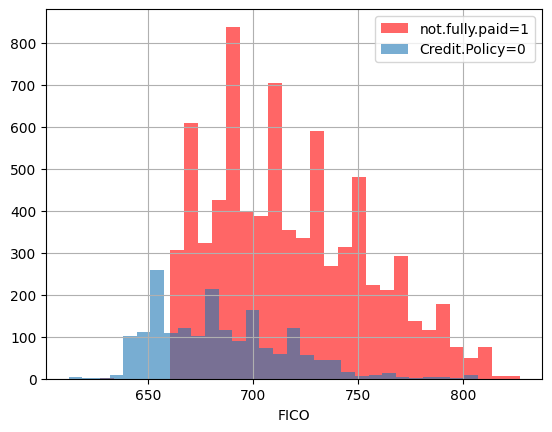

In [17]:
#previously we tried to understand how we can read data by specific functions.
#Now, we are going to analyse the data. 

#Frist, let's start with a dual histogram of the FICO score of the borrowers, depending on the credit policy.

loans[loans['credit.policy']==1]['fico'].hist(bins=30,alpha=0.6,label='not.fully.paid=1',color='red')
loans[loans['credit.policy']==0]['fico'].hist(bins=30,alpha=0.6,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')


Text(0.5, 0, 'FICO')

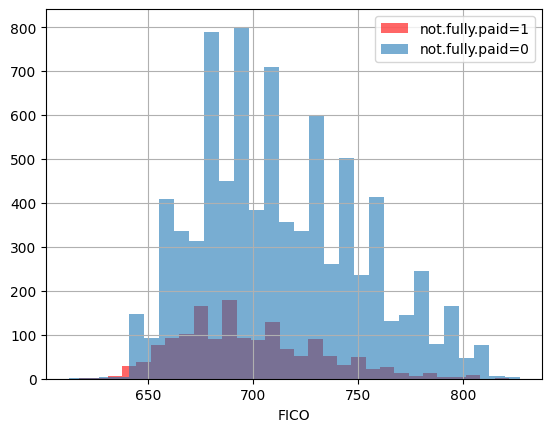

In [18]:
#Now, we will apply the same code to analyse different data strucute in the data file. 

loans[loans['not.fully.paid']==1]['fico'].hist(bins=30,alpha=0.6,label='not.fully.paid=1',color='red')
loans[loans['not.fully.paid']==0]['fico'].hist(bins=30,alpha=0.6,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

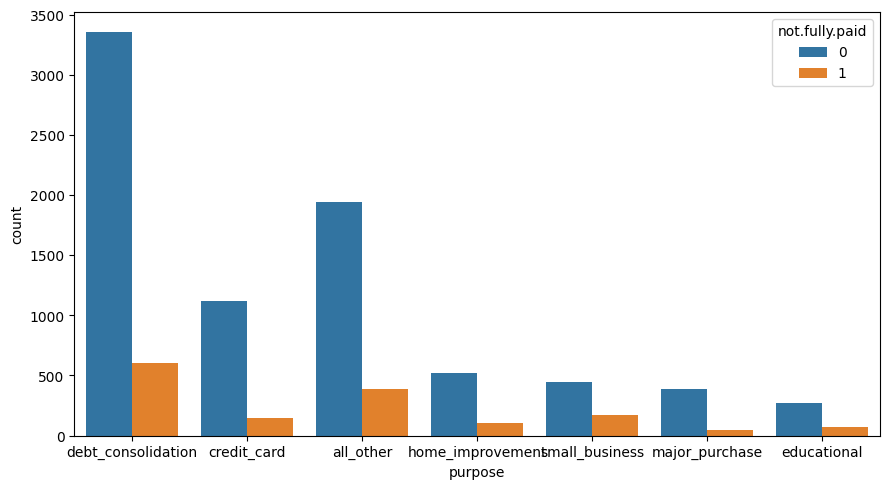

In [19]:
#Now we are going to create visualized bar chart for thre data, based on whether a borrower fully paid the loan back or not.

plt.figure(figsize=(9,5))
sns.countplot(x=loans['purpose'],hue=loans['not.fully.paid'])
plt.tight_layout()


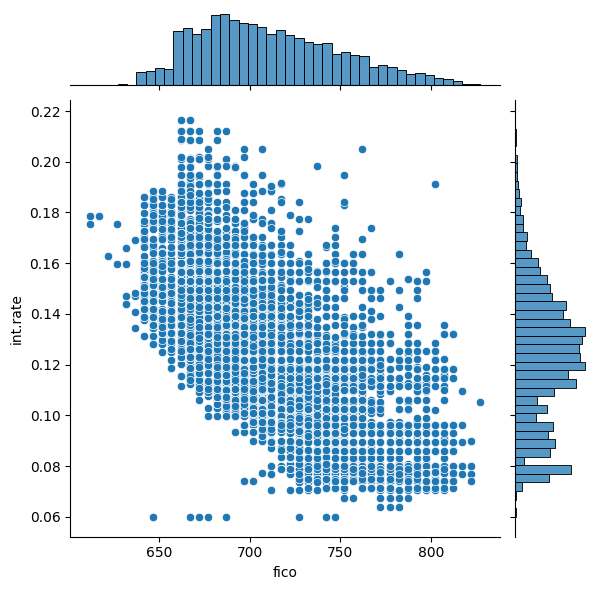

In [20]:
#Let's now discuss about the trend between FICO and interest rate.

sns.jointplot(x='fico', y='int.rate' ,data=loans)

In [23]:
#after analysing the data patterns, we are now goint to build the models.
#The purpose column is categorical.
#That means we need to transform them using dummy variables so sklearn will be able to understand them.

#creating a list of all categorial features.
cat_feats = ['purpose']

final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

final_data.columns


Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business'],
      dtype='object')

In [28]:
x = final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.3)

#training the decision tree model
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(x_train,y_train)


DecisionTreeClassifier()

In [29]:
predictions = dtree.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      2409
           1       0.24      0.28      0.26       465

    accuracy                           0.74      2874
   macro avg       0.55      0.55      0.55      2874
weighted avg       0.76      0.74      0.75      2874



In [30]:
print(confusion_matrix(y_test,predictions))

[[1991  418]
 [ 334  131]]


In [32]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(x_train, y_train)


RandomForestClassifier()

In [34]:
predictions = rfc.predict(x_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2409
           1       0.52      0.03      0.05       465

    accuracy                           0.84      2874
   macro avg       0.68      0.51      0.48      2874
weighted avg       0.79      0.84      0.77      2874



In [35]:
print(confusion_matrix(y_test,predictions))

[[2397   12]
 [ 452   13]]


In [ ]:
#we can see that the random forest performed somewhat better than the decision tree model.